<a href="https://colab.research.google.com/github/Mahsalo/BasicML/blob/main/FashionMNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(tr_images,tr_labels),(ts_images,ts_labels)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


training size (60000, 28, 28)
training labels (60000,)
test size (10000, 28, 28)
test labels (10000,)
5


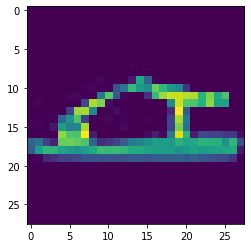

In [3]:
print('training size',tr_images.shape)
print('training labels',tr_labels.shape)
print('test size',ts_images.shape)
print('test labels',ts_labels.shape)


plt.imshow(tr_images[120])
print(tr_labels[120])

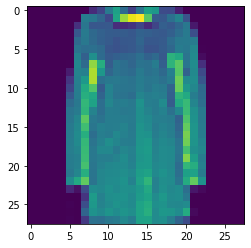

In [4]:
## Normalizing the values
tr_images = tr_images/255
ts_images = ts_images/255
plt.imshow(ts_images[150])


In [5]:
## Define the model and the layers by using Sequential
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])

In [6]:
## Define the optimizer, the loss function and the metric in the model.compile
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
## Train the model by using model.fit
model.fit(tr_images,tr_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5760 - accuracy: 0.7975
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3626 - accuracy: 0.8667
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3226 - accuracy: 0.8799
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2954 - accuracy: 0.8894
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2717 - accuracy: 0.8992
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2624 - accuracy: 0.9007
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2543 - accuracy: 0.9056
Epoch 8/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2366 - accuracy: 0.9118
Epoch 9/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2308 - accuracy: 0.9128
Epoch 10/20
1875/1875 [==============================] - 15s 8ms/step - l

In [10]:
model.evaluate(ts_images,ts_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.8787


[0.44665849208831787, 0.8787000179290771]

In [11]:
pred = model.predict(ts_images)
print(pred[0])

[3.0767321e-13 3.4346314e-15 1.6195693e-12 4.4554950e-20 3.8890512e-16
 4.5795990e-05 1.7631484e-14 3.2803809e-04 3.2746006e-14 9.9962616e-01]


In [1]:
import tensorflow as tf
print(tf.__version__)

###Define a callbacks class to end the training after hitting a threshold
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
###Call the class
callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

###Include the callbacks while fitting the model
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.4.1
4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5911
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3688

Reached 60% accuracy so cancelling training!


**Defining different layers:**

- Sequential: That defines a SEQUENCE of layers in the neural network

- Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

- Dense: Adds a layer of neurons

- Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

- Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

- Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


**Some Important points**

- Increasing the number of neurons makes the model more complicated and the training would take a longer time but most of the times (not always) the accuracy increases.

- The Flatten() layer is used when the input is an image (2D) and in the neural networks the input must look like a vector so we MUST flatten it.

- Adding more layers would be good if th model needs to be more comlicated otherwise it's not essential.

- If we increase the number of epochs overfitting might happen!

- What is the effect of normalizing the data? What will happen if we don't normalize it? I think the loss gets smaller if we normalize the data.

- In order to stop the training after some level of accuracy we have to call the "Callback class" and set the desirable accuracy in that class. It will stop after an epoch in which the loss/accuracy has hit the threshold.


